In [12]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
parquet_file= r'C:\Users\verma\OneDrive\Desktop\PYTHON_DATA_PROJECT\1_Data_science_job_postings_dataset\0000.parquet'
df = pd.read_parquet(parquet_file, engine='auto')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [13]:
df_india = df[df.job_country == 'India'].copy()

In [14]:
df_india['month']=df_india['job_posted_date'].dt.strftime('%B')

In [15]:
df_pivot = df_india.pivot_table(index='month', columns='job_title_short', values='salary_year_avg', aggfunc='size')
df_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [16]:
top_job_titles = df['job_title_short'].value_counts().head(4).index.tolist()

In [17]:
pivot_plot = df_pivot[top_job_titles].reset_index()

In [18]:
pivot_plot['month_no'] = pd.to_datetime(pivot_plot['month'], format='%B').dt.month

In [19]:
pivot_plot.sort_values('month_no',inplace=True)

In [20]:
pivot_plot.drop(columns='month_no',inplace=True)

In [21]:
plot_final = pivot_plot.set_index('month')

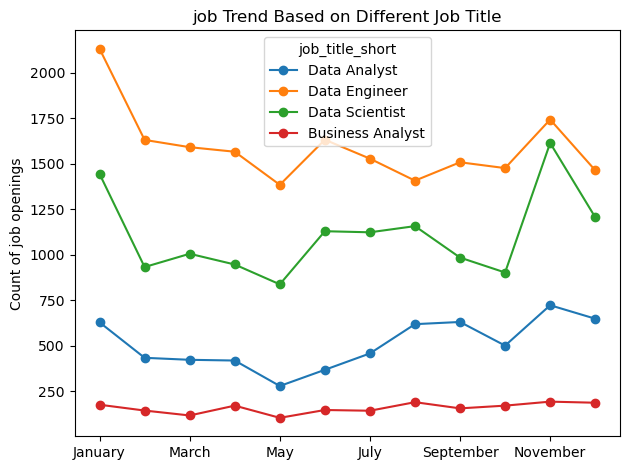

In [22]:
plot_final.plot(kind='line', marker='o')
plt.title('job Trend Based on Different Job Title')
plt.ylabel('Count of job openings')
plt.xlabel('')
plt.tight_layout()